k=2, 轮廓分数=0.6810
k=3, 轮廓分数=0.5512
k=4, 轮廓分数=0.4976
k=5, 轮廓分数=0.4931
k=6, 轮廓分数=0.3678
k=7, 轮廓分数=0.3543
k=8, 轮廓分数=0.3447
k=9, 轮廓分数=0.3156
k=10, 轮廓分数=0.3014


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\883408325.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, silhouette_scores, 'bo-', color='purple', linewidth=2, markersize=8)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\883408325.py:43: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\883408325.py:43: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\883408325.py:43: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\883408325.py:43: UserWarning: Glyph 37327 (\N{CJK UNIFIE

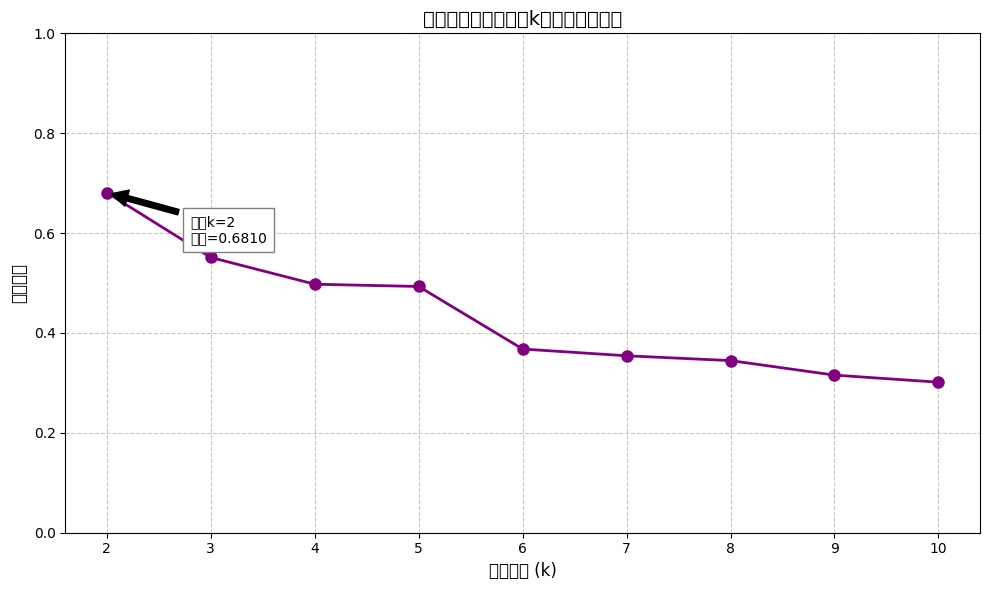

In [5]:
import numpy as np

# 设置随机种子
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris


# 加载鸢尾花数据集
X, y = load_iris().data, load_iris().target

# 定义要测试的k值范围（轮廓分数不适用于k=1）
k_range = range(2, 11)
silhouette_scores = []

# 计算每个k值的轮廓分数
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)  # 拟合并预测
    score = silhouette_score(X, kmeans.labels_)  # 计算轮廓分数
    silhouette_scores.append(score)
    print(f"k={k}, 轮廓分数={score:.4f}")

# 绘制轮廓分数图
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', color='purple', linewidth=2, markersize=8)
plt.xlabel('聚类数量 (k)', fontsize=12)
plt.ylabel('轮廓分数', fontsize=12)
plt.title('鸢尾花数据集在不同k值下的轮廓分数', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# 标记最佳k值
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.annotate(f'最佳k={best_k}\n分数={best_score:.4f}',
             xy=(best_k, best_score),
             xytext=(best_k+0.8, best_score-0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10,
             bbox=dict(facecolor='white', edgecolor='gray', pad=5))

plt.xticks(k_range, fontsize=10)
plt.ylim(0, 1)  # 轮廓分数范围在[-1,1]，这里聚焦在0-1之间
plt.tight_layout()
plt.show()


k=3时的平均轮廓分数: 0.5512


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\1466305236.py:69: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\1466305236.py:69: UserWarning: Glyph 24275 (\N{CJK UNIFIED IDEOGRAPH-5ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\1466305236.py:69: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\1466305236.py:69: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22264\1466305236.py:69: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_222

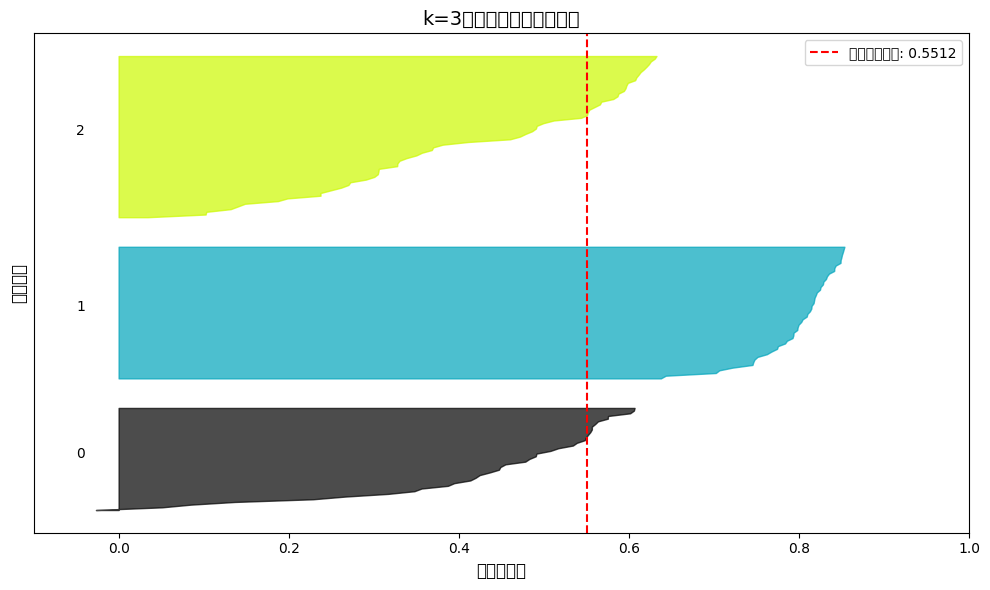

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import load_iris

# 加载数据
X, y_true = load_iris().data, load_iris().target

# 选择一个k值（可以根据之前的最佳k值结果设置）
k = 3  # 鸢尾花数据集实际有3个类别，这里作为示例

# 训练KMeans模型
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# 计算平均轮廓分数
average_score = silhouette_score(X, cluster_labels)
print(f"k={k}时的平均轮廓分数: {average_score:.4f}")

# 计算每个样本的轮廓系数
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# 绘制每个样本的轮廓系数
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
y_lower = 10  # 初始y轴位置

for i in range(k):
    # 获取第i个聚类的所有样本的轮廓系数
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    # 排序
    ith_cluster_silhouette_values.sort()
    # 该聚类的样本数量
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    # 计算该聚类在y轴上的位置
    y_upper = y_lower + size_cluster_i

    # 为每个聚类分配颜色
    color = cm.nipy_spectral(float(i) / k)
    color = cm.nipy_spectral(float(i) / k)
    # 绘制横向条形图
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # 在每个聚类的中间位置添加聚类编号
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # 更新下一个聚类的y轴起始位置
    y_lower = y_upper + 10  # 留10个单位的间隔

# 添加平均轮廓分数的参考线
ax1.axvline(x=average_score, color="red", linestyle="--", label=f"平均轮廓分数: {average_score:.4f}")

# 设置图形属性
ax1.set_title(f'k={k}时每个样本的轮廓系数', fontsize=14)
ax1.set_xlabel('轮廓系数值', fontsize=12)
ax1.set_ylabel('聚类编号', fontsize=12)
ax1.set_xlim([-0.1, 1.0])  # 轮廓系数范围在[-1,1]
ax1.set_yticks([])  # 不显示y轴刻度（已用聚类编号标记）
ax1.legend()

plt.tight_layout()
plt.show()
